# ÁRBOLES DE DECISIÓN

"PUREZA" si la nube tiene una ........

.......


.....

In [ ]:
Tres funciones de impureza......

In [2]:
import seaborn as sb
iris = sb.load_dataset("iris")
iris["etiketa"] = iris.species.astype("category").cat.codes 

### Hemos codificado la especie para poder mostrar las fronteras de decisión,  por ese mismo motivo vamos a entrenarlo con solo dos características predictivas.

In [45]:
X = iris[["sepal_length", "sepal_width"]]
y = iris.etiketa
iris

,sepal_length,sepal_width,petal_length,petal_width,species,etiketa
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [6]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X.values, y)

DecisionTreeClassifier()

# Vamos a visualizar las fronteras de decisión

In [8]:
from fronteras import plot_fronteras_decision, mostrar_fronteras

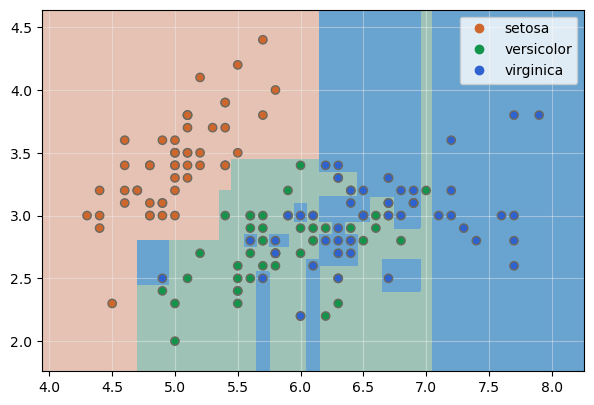

In [9]:
mostrar_fronteras(modelo, X.values, None, y, None, iris.species.unique())

Aun que parezca que coge todo, esto no es bueno

### Podemos visualizar el árbol de decisión usando la función plot_tree() que se encuentra en la librería "sklearn"

In [14]:
from sklearn.tree import plot_tree

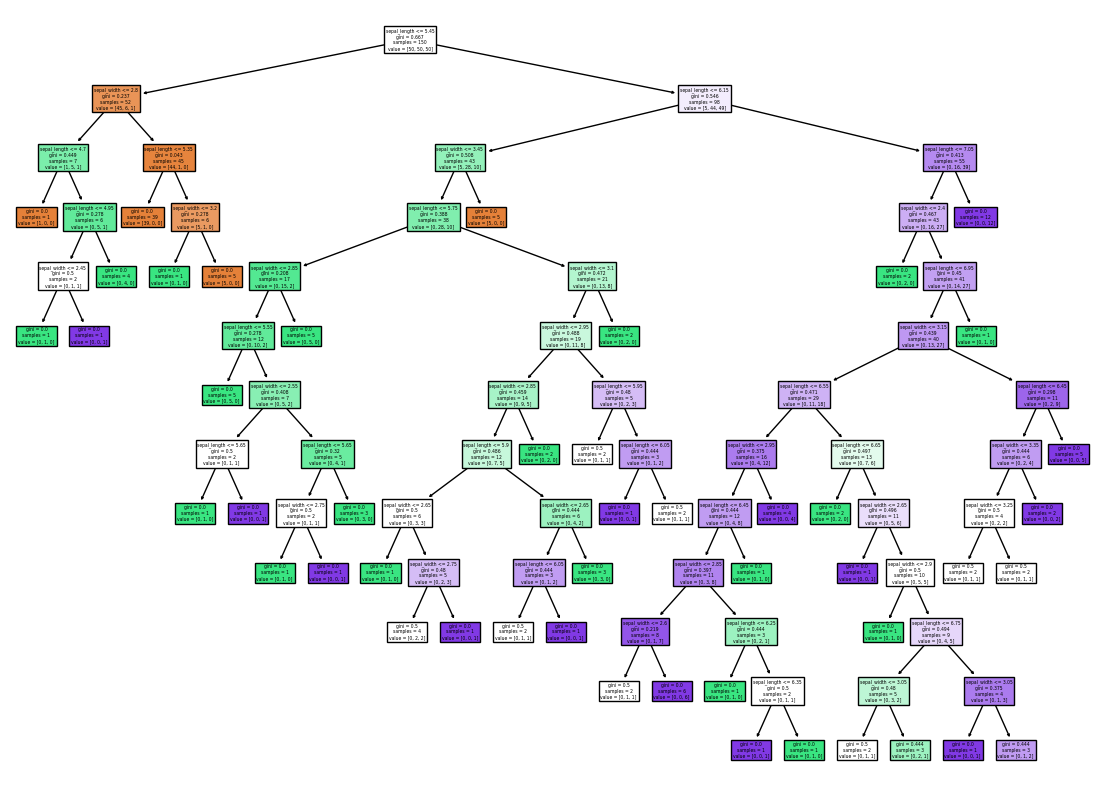

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 10))
plot_tree(modelo, filled = True, feature_names = X.columns)
plt.show()

Nos genera un arbol con demasiados niveles. Demasiadas "preguntas".

Cuando pasa esto es que el algoritmo ha sido sobre-entrenado. 

# REGULARIZACIÓN

- Tenemos varios metodos
    + max_depth
    + min_sample_split
    + min_sample_left
    + max_leaf_nodes
    + min_impurity_split

### Vamos a limitar la profundidad máximo del árbol

In [66]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 0)
model.fit(X.values, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

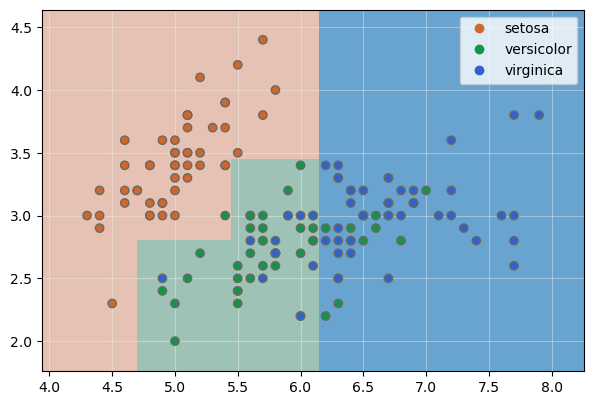

In [67]:
mostrar_fronteras(model, X.values, None, y, None, iris.species.unique())

### Vamos a crear el árbol

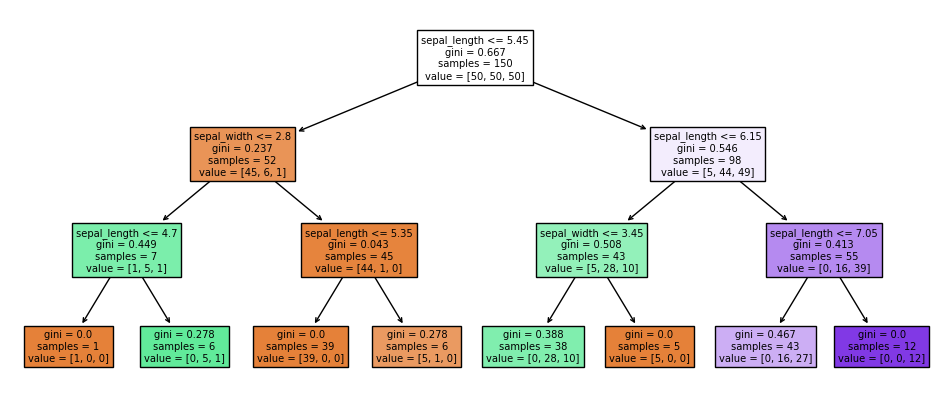

In [65]:
fig, ax = plt.subplots(figsize = (12, 5))
plot_tree(model, filled = True, feature_names = X.columns)
plt.show()

In [ ]:
Cuanto más oscuro es el color, mayor pureza

In [ ]:
Cuanto el 

Fondo naranja

...

### Vamos a ver la exactitud (número de muestrass bvien clasificadas) del modelo


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
model2 = DecisionTreeClassifier(max_depth =3, random_state = 42) # el random_state es la "SEMILLA" (buscar el cincepto en google)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [42]:
model2.score(X_test, y_test)

0.7894736842105263

In [43]:
Xtest4 = X_test.iloc[[3]]
Xtest4

,sepal_length,sepal_width
4,5.0,3.6


In [46]:
Xtest4 = X_test.loc[[141]]
Xtest4

,sepal_length,sepal_width
141,6.9,3.1


### Vamos a obtener la predicción de la muestra

In [47]:
model.predict(Xtest4)

C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([2], dtype=int8)

Segun nuestro modelo, la muestra es de clase 2

In [49]:
### Cual es la probalbiledad asociada a esta predicción?

In [50]:
model2.predict_proba(Xtest4)

array([[0.        , 0.38461538, 0.61538462]])

Nos saca un array de 3 valores. Y vemos que la probabilidad de que el dato sea un "2" (acordarse, 0, 1, 2, clasificación) es de 0.61538462

- Hay una probabilidad del 0% de que la muestra pertenezca a la clase 0
- Hay una probabilidad del 38.33% de que pertenezca a la clase 1.
- Hay una probabilidad del 61.66% de que pertenezca a la clase 2.

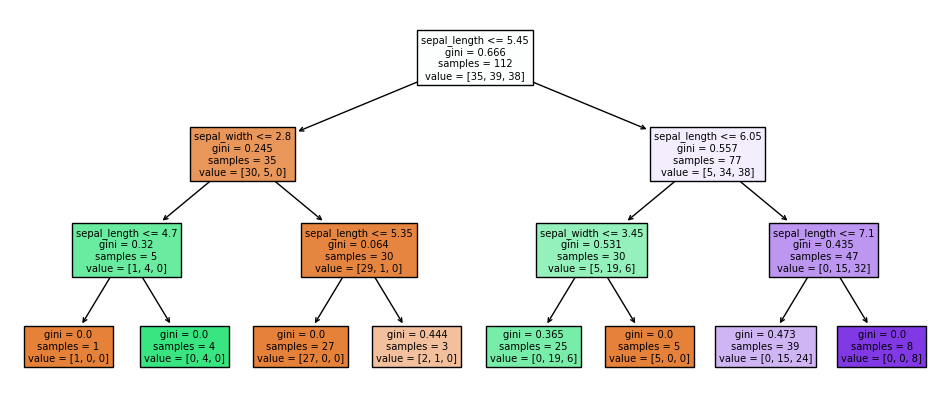

In [51]:
fig, ax = plt.subplots(figsize = (12, 5))
plot_tree(model2, filled = True, feature_names = X_test.columns)
plt.show()

Impacto de la profundidad máxima............

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Vamos a entrenar 20 modelos

In [56]:
train_scores = []
test_scores = []
for depth in range(1, 21): # Hacemos un bucles para crear niveles
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

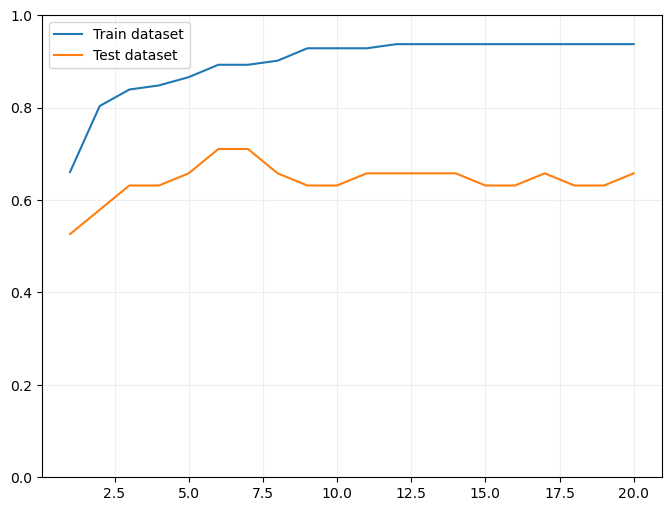

In [59]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(range(1, 21), train_scores, label = "Train dataset")
ax.plot(range(1, 21), test_scores, label = "Test dataset")
ax.grid(color = "#EEEEEE", zorder = 0)
ax.set_ylim(0,1)
ax.legend()
plt.show()

Los datos de TEST son los que nos sirven para validar el modelo